<a href="https://colab.research.google.com/github/MuhammedShiway/AICrowd-Mosquito/blob/main/%5B01%5D_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive




---

# <center> IMPORT MODULES AND LIBRARIES </center>


---



In [4]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import random

In [3]:
train_path = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/train_images'
train_csv_path = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/train.csv'



---

# <center> PRELIMINARIES </center>


---



In [18]:
  df = load_csv(train_csv_path)
  df.head()

,img_fName,img_w,img_h,bbx_xtl,bbx_ytl,bbx_xbr,bbx_ybr,class_label
0,92715872-3287-4bff-aa61-7047973e5c02.jpeg,2448,3264,1301,1546,1641,2096,albopictus
1,b0f7cc74-2272-4756-a387-38bcaf6965c8.jpeg,3024,4032,900,1897,1950,2990,albopictus
2,82df4b68-0f45-4afe-9215-48488bf3720e.jpeg,768,1024,220,58,659,808,albopictus
3,331ad30a-7564-4478-b863-7bc760adf5a1.jpeg,3456,4608,1169,2364,1586,2826,albopictus
4,1a46dbfb-104e-466b-88d7-98958d7b1fe9.jpeg,1024,1365,129,231,697,1007,culex




---

# <center> DEFINE MODULAR FUNCTIONS </center>


---



In [5]:
def load_csv(csv_file):
    df = pd.read_csv(csv_file)
    return df

In [13]:
def get_random_images(df, image_folder, num_images=5):
    random_images = random.sample(df['img_fName'].tolist(), num_images)
    return [os.path.join(image_folder, img) for img in random_images]

In [44]:
def plot_images(image_paths, df):
    fig, axs = plt.subplots(2, len(image_paths), figsize=(20, 10), gridspec_kw={'hspace': 0.1})

    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        img_data = np.array(img)
        axs[0, i].imshow(img_data)

        # Get the bounding box information for this image
        img_name = os.path.basename(img_path)
        if (df['img_fName'] == img_name).any():
            bbox_info = df[df['img_fName'] == img_name]

            # Draw the bounding box
            rect = patches.Rectangle(
                (bbox_info['bbx_xtl'].iloc[0], bbox_info['bbx_ytl'].iloc[0]),
                bbox_info['bbx_xbr'].iloc[0] - bbox_info['bbx_xtl'].iloc[0],
                bbox_info['bbx_ybr'].iloc[0] - bbox_info['bbx_ytl'].iloc[0],
                linewidth=1,
                edgecolor='r',
                facecolor='none'
            )
            axs[0, i].add_patch(rect)

            # Extract mosquito from the image using bounding box and plot it
            extracted_mosquito = img_data[bbox_info['bbx_ytl'].iloc[0]:bbox_info['bbx_ybr'].iloc[0],
                                          bbox_info['bbx_xtl'].iloc[0]:bbox_info['bbx_xbr'].iloc[0]]
            axs[1, i].imshow(extracted_mosquito)

    plt.tight_layout() # adjusts subplot params so that subplots fit into the figure area.
    plt.show()


In [50]:
def plot_images(image_paths, df):
    fig, axs = plt.subplots(2, len(image_paths), figsize=(20, 10), gridspec_kw={'hspace': 0.1})

    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        img_data = np.array(img)
        axs[0, i].imshow(img_data)

        # Get the bounding box information for this image
        img_name = os.path.basename(img_path)
        if (df['img_fName'] == img_name).any():
            bbox_info = df[df['img_fName'] == img_name]

            # Draw the bounding box
            rect = patches.Rectangle(
                (bbox_info['bbx_xtl'].iloc[0], bbox_info['bbx_ytl'].iloc[0]),
                bbox_info['bbx_xbr'].iloc[0] - bbox_info['bbx_xtl'].iloc[0],
                bbox_info['bbx_ybr'].iloc[0] - bbox_info['bbx_ytl'].iloc[0],
                linewidth=1,
                edgecolor='r',
                facecolor='none'
            )
            axs[0, i].add_patch(rect)

            # Extract mosquito from the image using bounding box and plot it
            extracted_mosquito = img_data[bbox_info['bbx_ytl'].iloc[0]:bbox_info['bbx_ybr'].iloc[0],
                                          bbox_info['bbx_xtl'].iloc[0]:bbox_info['bbx_xbr'].iloc[0]]
            axs[1, i].imshow(extracted_mosquito)

        # Set the label for the full image
        axs[0, i].set_title('{}'.format(img_name))

    plt.tight_layout() # adjusts subplot params so that subplots fit into the figure area.
    plt.show()



---

# <center> EXTRACT THE BBOXES </center>


---


In [48]:
def bbox_extractor():
    image_folder = train_path
    df = load_csv(train_csv_path)
    image_paths = get_random_images(df, image_folder, num_images=5)
    plot_images(image_paths, df)


<ipython-input-50-e3f87f2272f0>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() # adjusts subplot params so that subplots fit into the figure area.


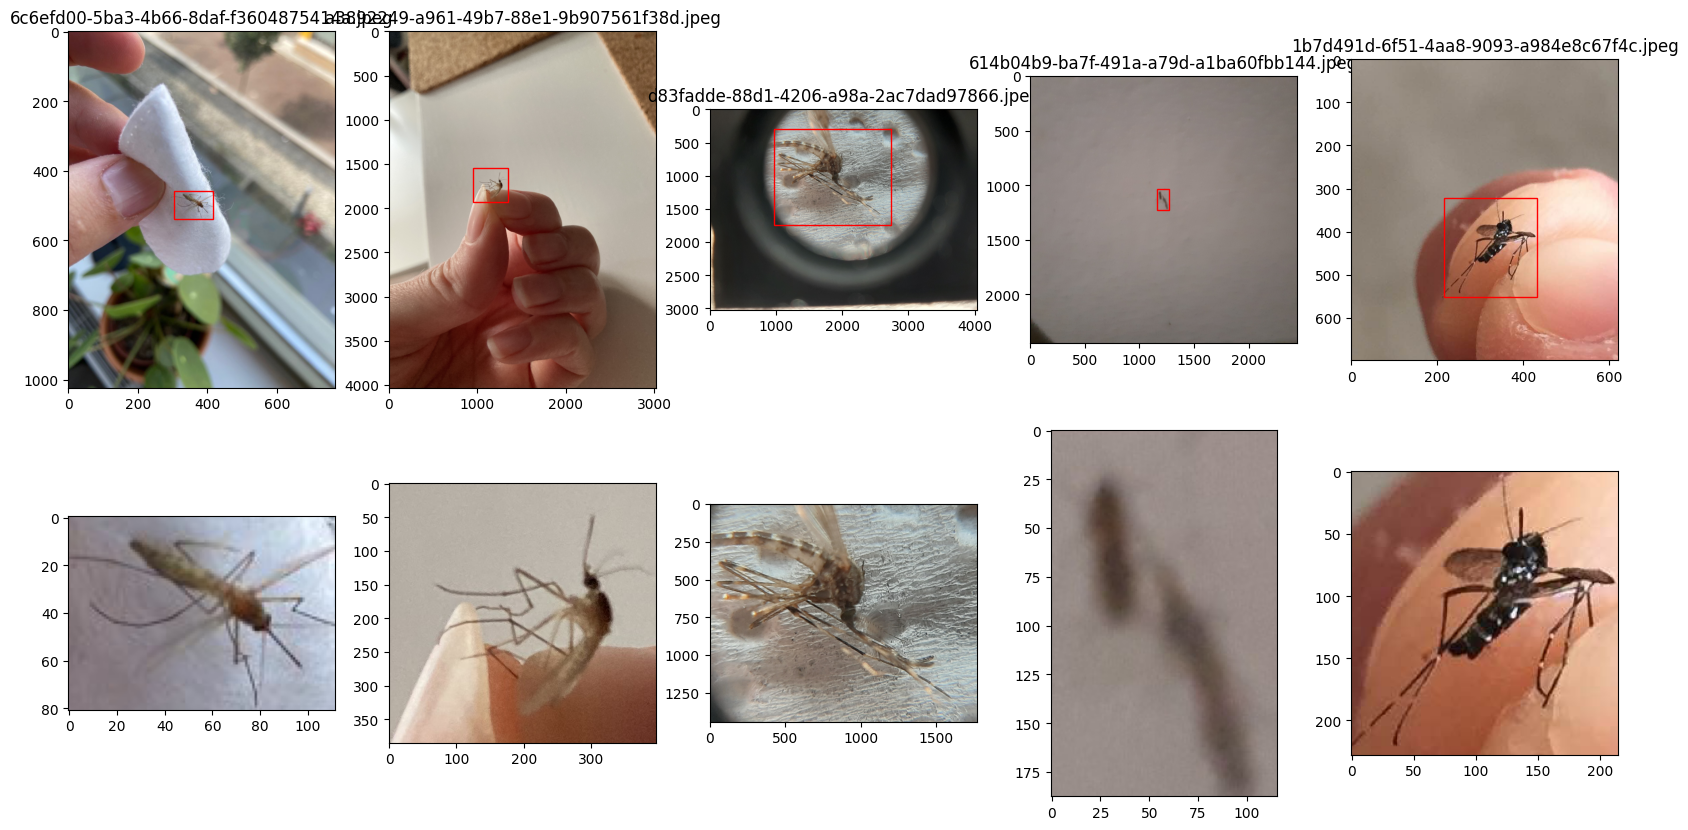

In [59]:
bbox_extractor()